In [1]:
import sys
import rics

# Print relevant versions
print(f"{rics.__version__=}")
print(f"{sys.version=}")
!git log --pretty=oneline --abbrev-commit -1

rics.__version__='3.0.0'
sys.version='3.10.6 (main, Mar 10 2023, 10:55:28) [GCC 11.3.0]'
d2093a4 (HEAD, origin/main, origin/HEAD, main) Update help link in TOML files


In [2]:
import logging

rics.configure_stuff(level=logging.INFO, rics_level=logging.DEBUG)

👻 Configured some stuff just the way I like it!


# Title: Template
Short description of what we're testing. This is a template to copy for new stuff.

## Load data
Load some representative data we need for testing (that doesn't change between test cases or candidates).

In [3]:
import random

test_data = random.choices(
    [
        0.000000,
        0.000025,
        # 0.000050,
    ],
    k=10_000,
)

## Define the test procedure
Define the test case we want to evaluate.

## Define candidates
Define the functions or classes we're testing. Add to `candidates` list.

In [4]:
import time


def ignore_input(arg):
    return "foo"  # Ignore input


def act_on_input(arg):
    time.sleep(sum(arg))  # Process input
    return "foo"


candidates = [ignore_input, act_on_input]

## Verification
Make sure candidates are equivalent.

In [5]:
reference_output = candidates[0](test_data)
assert reference_output is not None
print("Reference output:", reference_output)

for cand in candidates[1:]:
    cand_output = cand(test_data)
    assert (
        reference_output == cand_output
    ), f"Bad candidate: {cand}. {cand_output=} != {reference_output=}"

Reference output: foo


## Run performance comparison
Run comparison, show results per candidate and test data set.

2023-03-25T11:16:09.997 [rics.performance:INFO] Evaluate candidate 'ignore_input' 5x14854837 times..
/home/dev/git/id-translation/.venv/lib/python3.10/site-packages/rics/performance/_multi_case_timer.py:83: UserWarning: The test results may be unreliable for ('ignore_input', "Sample data: '[0.0, 0.0, 2.5e-05, 2.5e-05, ...'"). The worst time 0.00040858 sec was ~1865.7 times slower than the best time (2.19e-07 sec).
  warnings.warn(
2023-03-25T11:16:18.529 [rics.performance:INFO] Evaluate candidate 'act_on_input' 5x9 times..


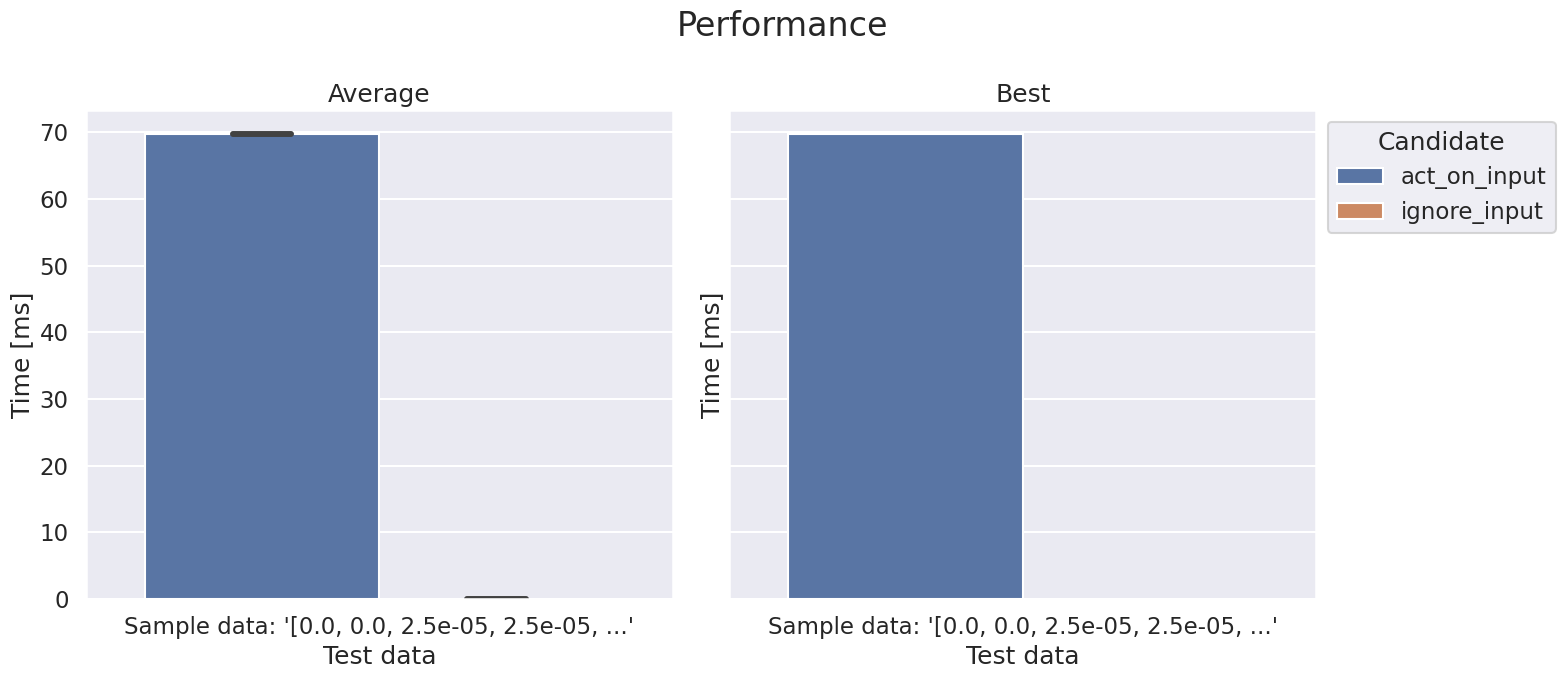

In [6]:
from rics.performance import run_multivariate_test, get_best

data = run_multivariate_test(candidates, test_data)

### Performance summary
Summarized results per candidate.

In [7]:
get_best(data)

,Candidate,Test data,Run no,Time [s],Time [ms],Time [μs],Times min,Times mean
9302850,ignore_input,"Sample data: '[0.0, 0.0, 2.5e-05, 2.5e-05, ...'",9302850,1.47427e-14,1.47427e-11,1.47427e-08,1,3.48811e-07


# Conclusion
Short summary. Looks like doing nothing is faster than doing something.